In [ ]:
!pip3 install beautifulsoup4
!pip3 install requests
!pip3 install pandas
!pip3 install nltk
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu
!pip3 install wordcloud

In [ ]:
import requests
import nltk
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from pprint import pprint

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

#English Corpus Generator

In [ ]:
base_url = 'https://www.theverge.com/22587205/framework-laptop-review' 

In [ ]:
from queue import Queue
from re import sub, split, M

q = Queue(maxsize = 0)

q.put(base_url)

nsent = 0
engcorpus = ""
visited = []

while nsent <= 10000: 
  length = q.qsize()
  if length > 0:

    url = q.get()
    if url not in visited:

      req = requests.get(url)
      content = req.content
      soup = BeautifulSoup(content, 'html5lib')

      for data_corpus in soup.find_all("div", class_="c-entry-content"):
        data = data_corpus.findChildren("p") #change this according to the corpus that i end up choosing 
        for i in data:
          next_p = i.get_text()
          sent = nltk.sent_tokenize(next_p)
          for j in sent:
            if 'Related' not in j and 'Price' not in j and 'https:' not in j and '$' not in j and 'pic.twitter' not in j: #this is what i think is needed for cleaning my corpus a bit before final cleaning later
              j = sub(r'[’]', '\'', j) #fixing up the weird ' in my text
              nsent = nsent + 1
              engcorpus = engcorpus + "\n" + j

      if nsent <= 10000:
        data_corpus = soup.find_all('a') #add a condition so that only good links are appended so that it's cute to analyze the data later 
        for i in data_corpus:
          link = i.get('href')
          if link is not None:
            if 'https://www.theverge.com' in link and 'mailto:' not in link: #ensuring that i keep getting links of the same kind 
                q.put(link)

      visited.append(url)

print(engcorpus)


There are a lot of 13-inch and 14-inch laptops out there, but very few offer much in the way of user-upgradability.
Framework, a San Francisco-based startup, sees an opening in the market there.
The new 13.5-inch Framework laptop allows customers to upgrade and replace not only internal parts (RAM, battery, storage), but also external components (the keyboard, bezels, and ports).
If you're very particular about your specs, you can also order a “DIY edition,” including parts of your choosing, and assemble the laptop yourself.
I suspect most people will go for one of the three pre-built systems that Framework has on offer, which can then be tweaked as needed.
Outside of its customizability, the Framework is a fairly standard productivity ultraportable.
It's a bit smaller than an M1 MacBook Pro, at 2.87 pounds and 0.62 inches thick.
The chassis incorporates recycled materials.
There's a decently bright 3:2 display (with no touch option as of now), and a usable keyboard and touchpad.
You'

In [ ]:
#writing the corpus to a text file 
with open('/content/englishCorpus.txt', 'w') as writefile:
    writefile.write(engcorpus)

#Cleaning the English Corpus

In [ ]:
from re import sub, split, M

#reading the text
with open('/content/englishCorpus.txt', 'r') as f:
    lines = f.readlines()

#removing all punctuation from the corpus - i don't think i need to do any more cleaning 
cleancorp = ""

for line in lines:
  line = sub(r'[\.\,\(\)\-\—\”\“\:\?\n\…\।\_\–\#\¿\?\¡\í\!\\\/\á\[\]\;]', ' ', line) #not removing the ' cause it might cause problems later during tokenization
  print(line)
  if len(cleancorp) > 0:
    cleancorp = cleancorp +  "\n" + line
  else:
    cleancorp = line

#put the obtained output in another text file 
with open('/content/englishCleanCorpus.txt', 'w') as writefile:
    writefile.write(cleancorp)

Streaming output truncated to the last 5000 lines.
Even though Garmin watches also share a ton of overlap  you can just eyeball a Venu  Fenix  and Forerunner and have a decent idea of who each watch caters to  
It's much harder to do this with Polar's watches on every level   and that's a disservice to both consumers and all the things Polar does well  
Photography by Victoria Song   The Verge 
Every smart device now requires you to agree to a series of terms and conditions before you can use it   contracts that no one actually reads  
It's impossible for us to read and analyze every single one of these agreements  
But we're going to start counting exactly how many times you have to hit  agree  to use devices when we review them since these are agreements most people don't read and definitely can't negotiate  
To use the Polar Pacer Pro  you must pair it with an iPhone or Android smartphone  
That includes the phone's Terms of Service  privacy policy  and any other permissions you gra

#Word Tokenization

In [ ]:
from nltk.tokenize import word_tokenize

with open('/content/englishCleanCorpus.txt', 'r') as f:
    lines = f.readlines()

wordlisteng = []
linenum = 0 #this is just for me to understand the progress of the code 

for line in lines:
  words = nltk.word_tokenize(line)
  linenum += 1
  print(linenum)
  for word in words:
    wordlisteng.append(word.lower())

Streaming output truncated to the last 5000 lines.
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215

### Finding word frequency

In [ ]:
from collections import Counter

wordcounteng = Counter(wordlisteng)
print(wordcounteng.most_common(30))

[('the', 11561), ('to', 6288), ('a', 6146), ('and', 5393), ('of', 4407), ('it', 3903), ("'s", 3634), ('that', 3147), ('is', 2940), ('you', 2891), ('in', 2719), ('for', 2309), ('with', 2142), ('on', 1950), ('i', 1829), ('but', 1542), ("n't", 1487), ('this', 1342), ('as', 1321), ('are', 1167), ('can', 1062), ('be', 1043), ('or', 1007), ('an', 1006), ('its', 999), ('have', 973), ('your', 881), ('at', 864), ('has', 862), ('more', 847)]


### Plotting the most frequent words

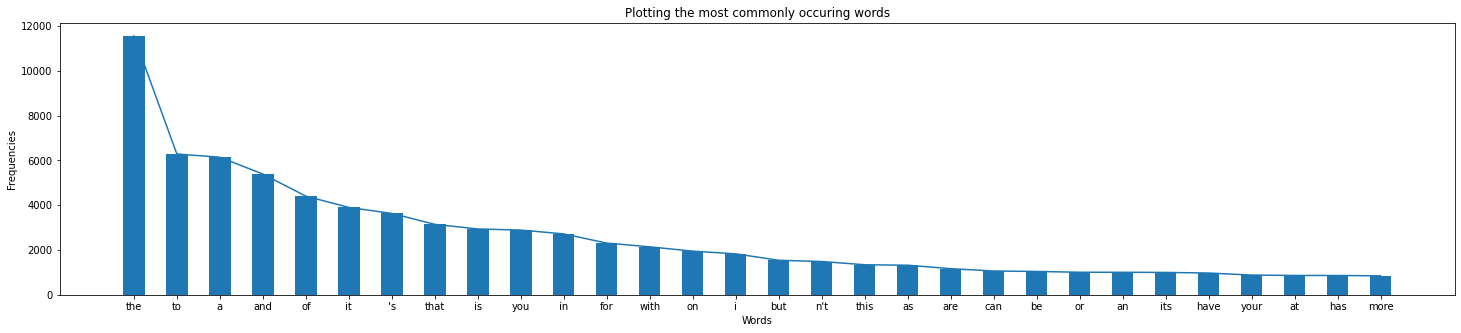

In [ ]:
from matplotlib import pyplot as plt

englishcommonwords = []
englishcommonwordfreq = []

for thing in wordcounteng.most_common(30):
  englishcommonwords.append(thing[0])
  englishcommonwordfreq.append(thing[1])

fig = plt.figure(figsize=(25,5))
plt.xlabel("Words")
plt.ylabel("Frequencies")
plt.title("Plotting the most commonly occuring words")
plt.bar(englishcommonwords, englishcommonwordfreq, width=0.5)
plt.plot(englishcommonwords,englishcommonwordfreq)
plt.show()

#Sentence Tokenization

In [ ]:
from re import sub, split, M

with open('/content/englishCorpus.txt', 'r') as f:
    lines = f.readlines()

engsent = []
engcleansent = []

for line in lines:
  engsent.append(line)
  line = sub(r'[\.\,\(\)\-\—\”\“\:\?\n\…\।\_\–\#\¿\?\¡\í\!\\\/\á\[\]\;\']', ' ', line)
  engcleansent.append(line)

#Removing Stopwords

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')

nostopeng = []

for word in wordlisteng:
  if word.lower() not in stop_words:
    nostopeng.append(word)

### Printing frequency of words without the stop words 

In [ ]:
from collections import Counter

wordcounteng = Counter(nostopeng)
print(wordcounteng.most_common(30))

[("'s", 3634), ("n't", 1487), ('also', 814), ('like', 810), ('one', 770), ('use', 665), ('google', 510), ("'re", 478), ('pro', 476), ('phone', 457), ('new', 430), ('get', 427), ('screen', 417), ('device', 392), ('samsung', 380), ('even', 379), ('time', 370), ('good', 360), ('two', 342), ('still', 323), ('laptop', 317), ('much', 312), ('apple', 309), ('company', 308), ('display', 302), ('features', 301), ('android', 299), ('devices', 298), ("'ll", 288), ("'ve", 288)]


### Plotting the most frequent words without the stop words 

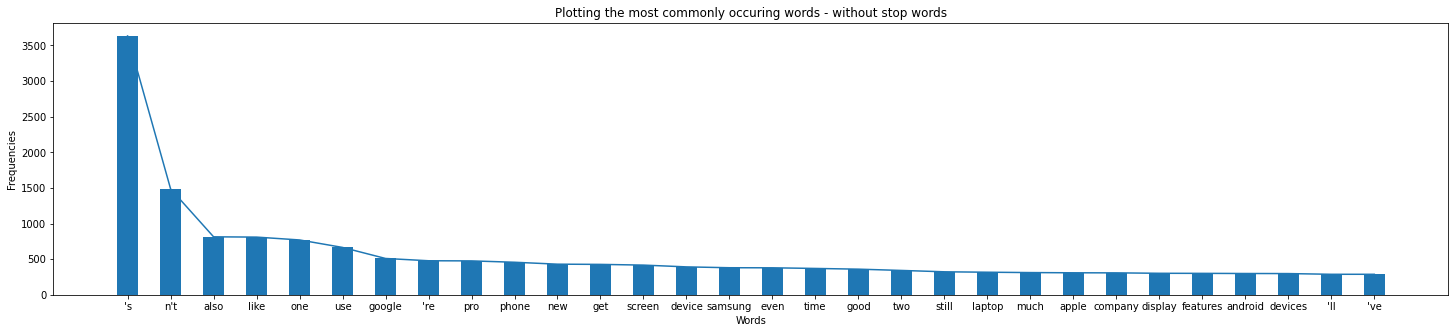

In [ ]:
from matplotlib import pyplot as plt

englishcommonwords = []
englishcommonwordfreq = []

for thing in wordcounteng.most_common(30):
  englishcommonwords.append(thing[0])
  englishcommonwordfreq.append(thing[1])

fig = plt.figure(figsize=(25,5))
plt.xlabel("Words")
plt.ylabel("Frequencies")
plt.title("Plotting the most commonly occuring words - without stop words")
plt.bar(englishcommonwords, englishcommonwordfreq, width=0.5)
plt.plot(englishcommonwords,englishcommonwordfreq)
plt.show()

### Findind the most common words without the stop words and words with ' 

In [ ]:
from collections import Counter

wordcounteng = Counter(nostopeng)

englishcommonwords = []
englishcommonwordfreq = []

i = 0

for thing in wordcounteng.most_common(100):
  if '\'' not in thing[0]:
    englishcommonwords.append(thing[0])
    englishcommonwordfreq.append(thing[1])
    i += 1

    if i == 30:
      break

### Plotting the frequencies of those words

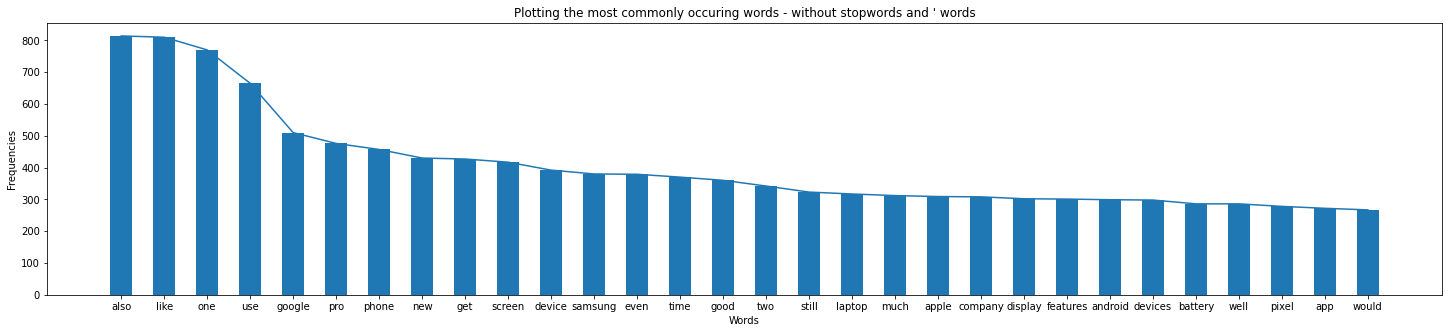

In [ ]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,5))
plt.xlabel("Words")
plt.ylabel("Frequencies")
plt.title("Plotting the most commonly occuring words - without stopwords and ' words")
plt.bar(englishcommonwords, englishcommonwordfreq, width=0.5)
plt.plot(englishcommonwords,englishcommonwordfreq)
plt.show()

# POS Tagging 

## Data without stopwords

In [ ]:
englishtagged = nltk.pos_tag(nostopeng)

for thing in englishtagged:
  print(thing)

Streaming output truncated to the last 5000 lines.
('data', 'VBP')
("n't", 'RB')
('pull', 'VB')
('data', 'NNS')
('fitness', 'NN')
('tracker', 'NN')
('presumably', 'RB')
('wearing', 'VBG')
('give', 'VB')
('better', 'RBR')
('assessment', 'NN')
('also', 'RB')
('provide', 'VBP')
('better', 'JJR')
('recommendations', 'NNS')
('workouts', 'NNS')
('right', 'RB')
('somewhat', 'RB')
('baffling', 'VBG')
('fitbit', 'NN')
("'s", 'POS')
('versa', 'NN')
('sense', 'NN')
("n't", 'RB')
('fitness', 'VBD')
('tracker', 'NN')
("'s", 'POS')
('also', 'RB')
('smartwatch', 'VBP')
('testing', 'VBG')
('google', 'NN')
('pixel', 'NN')
('3', 'CD')
('xl', 'JJ')
('fitbit', 'NN')
('able', 'JJ')
('key', 'JJ')
('messaging', 'VBG')
('apis', 'NN')
('could', 'MD')
('view', 'VB')
('incoming', 'JJ')
('messages', 'NNS')
('could', 'MD')
('respond', 'VB')
('quick', 'JJ')
('texts', 'NNS')
('even', 'RB')
('voice', 'VBP')
('text', 'JJ')
('features', 'NNS')
('sadly', 'RB')
('available', 'JJ')
('pair', 'NN')
('sense', 'NN')
('iphone'

### Finding the frequency of each POS tag

In [ ]:
tags = []

for thing in englishtagged:
  tags.append(thing[1])

tagcounteng = Counter(tags)

print(tagcounteng)

Counter({'NN': 39590, 'JJ': 21880, 'NNS': 12487, 'RB': 10038, 'CD': 6755, 'VBP': 6431, 'VBG': 5123, 'VBD': 3965, 'POS': 3670, 'VB': 3448, 'VBZ': 2722, 'IN': 2720, 'VBN': 2446, 'MD': 1707, 'JJR': 763, 'JJS': 530, 'RBR': 416, 'DT': 413, 'CC': 327, 'FW': 203, 'PRP': 200, 'NNP': 155, 'RP': 107, "''": 48, 'RBS': 41, 'WDT': 38, '$': 25, 'WP': 24, 'WP$': 16, 'UH': 12, 'WRB': 9, '``': 6, 'EX': 4, 'TO': 2})


### Plotting the 30 most common tags 

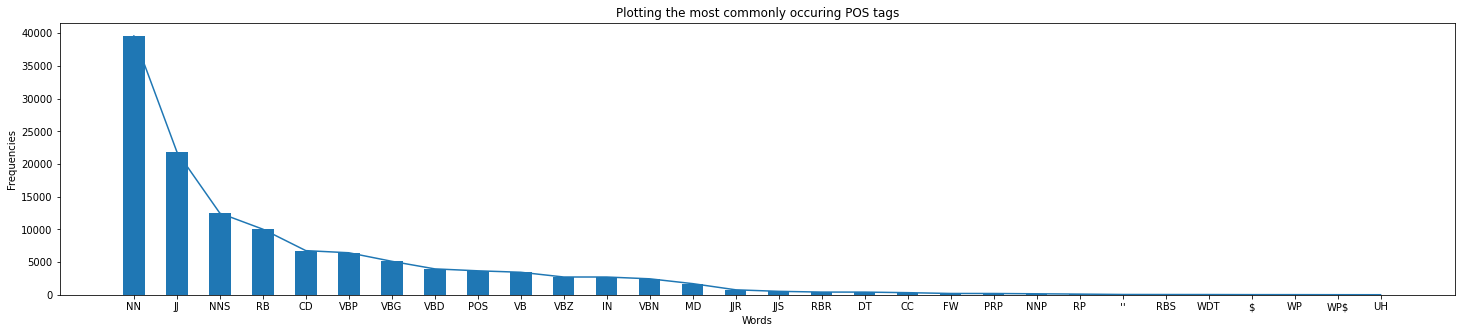

In [ ]:
from nltk.probability import FreqDist
from matplotlib import pyplot as plt

tags = []
freqs = []

for thing in tagcounteng.most_common(30):
  tags.append(thing[0])
  freqs.append(thing[1])

fig = plt.figure(figsize=(25,5))
plt.xlabel("Words")
plt.ylabel("Frequencies")
plt.title("Plotting the most commonly occuring POS tags")
plt.bar(tags, freqs, width=0.5)
plt.plot(tags, freqs)
plt.show()

### Data with stopwords 

In [ ]:
englishtagged1 = nltk.pos_tag(wordlisteng)

for thing in englishtagged1:
  print(thing)

Streaming output truncated to the last 5000 lines.
('on', 'IN')
('its', 'PRP$')
('accessibility', 'NN')
('api', 'IN')
('the', 'DT')
('last', 'JJ')
('method', 'JJ')
('third', 'JJ')
('party', 'NN')
('app', 'NN')
('developers', 'NNS')
('had', 'VBD')
('for', 'IN')
('getting', 'VBG')
('around', 'IN')
('its', 'PRP$')
('restrictions', 'NNS')
('without', 'IN')
('that', 'DT')
('android', 'NN')
('users', 'NNS')
('in', 'IN')
('the', 'DT')
('us', 'PRP')
('may', 'MD')
('have', 'VB')
('only', 'RB')
('one', 'CD')
('way', 'NN')
('of', 'IN')
('recording', 'VBG')
('calls', 'NNS')
('short', 'JJ')
('of', 'IN')
('rooting', 'VBG')
('their', 'PRP$')
('phones', 'NNS')
('use', 'VBP')
('google', 'JJ')
('voice', 'NN')
('to', 'TO')
('record', 'VB')
('incoming', 'NN')
('calls', 'VBZ')
('however', 'RB')
('voice', 'NN')
('does', 'VBZ')
('not', 'RB')
('let', 'VB')
('you', 'PRP')
('record', 'VB')
('outgoing', 'VBG')
('calls', 'NNS')
('even', 'RB')
('though', 'IN')
('it', 'PRP')
('announces', 'VBZ')
('the', 'DT')
('cal

### Finding the frequency of each POS tag

In [ ]:
tags = []

for thing in englishtagged1:
  tags.append(thing[1])

tagcounteng = Counter(tags)

print(tagcounteng)

Counter({'NN': 44308, 'IN': 24895, 'DT': 23536, 'JJ': 19607, 'RB': 12930, 'NNS': 12228, 'VB': 9949, 'VBZ': 9372, 'PRP': 8885, 'CC': 8221, 'CD': 6609, 'TO': 6290, 'VBP': 6044, 'VBG': 4949, 'VBD': 4103, 'VBN': 3808, 'MD': 3561, 'PRP$': 3082, 'WDT': 1990, 'POS': 1739, 'JJR': 1273, 'WRB': 1205, 'RP': 1128, 'JJS': 785, 'RBR': 744, 'EX': 670, 'WP': 582, 'RBS': 249, 'PDT': 175, 'NNP': 121, 'FW': 107, "''": 42, '$': 19, 'WP$': 16, 'UH': 12, '``': 6, 'NNPS': 1})


### Plotting the 30 most common tags 

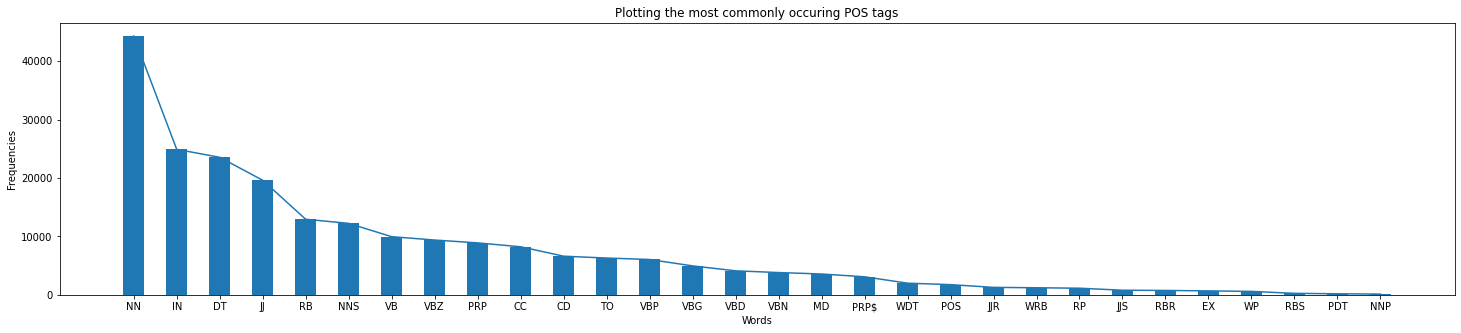

In [ ]:
from nltk.probability import FreqDist
from matplotlib import pyplot as plt

tags = []
freqs = []

for thing in tagcounteng.most_common(30):
  tags.append(thing[0])
  freqs.append(thing[1])

fig = plt.figure(figsize=(25,5))
plt.xlabel("Words")
plt.ylabel("Frequencies")
plt.title("Plotting the most commonly occuring POS tags")
plt.bar(tags, freqs, width=0.5)
plt.plot(tags, freqs)
plt.show()

#Stemming

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

stemlist = []

for word in englishtagged:
  print(word[0],"->",stemmer.stem(word[0]))
  stemlist.append(stemmer.stem(word[0]))

Streaming output truncated to the last 5000 lines.
data -> data
n't -> n't
pull -> pull
data -> data
fitness -> fit
tracker -> tracker
presumably -> presum
wearing -> wear
give -> give
better -> better
assessment -> assess
also -> also
provide -> provid
better -> better
recommendations -> recommend
workouts -> workout
right -> right
somewhat -> somewhat
baffling -> baffl
fitbit -> fitbit
's -> 's
versa -> versa
sense -> sens
n't -> n't
fitness -> fit
tracker -> tracker
's -> 's
also -> also
smartwatch -> smartwatch
testing -> test
google -> googl
pixel -> pixel
3 -> 3
xl -> xl
fitbit -> fitbit
able -> abl
key -> key
messaging -> messag
apis -> api
could -> could
view -> view
incoming -> incom
messages -> messag
could -> could
respond -> respond
quick -> quick
texts -> text
even -> even
voice -> voic
text -> text
features -> featur
sadly -> sadli
available -> avail
pair -> pair
sense -> sens
iphone -> iphon
also -> also
liked -> like
easy -> easi
control -> control
apps -> app
phone -> 

### Finding the most common word stems

In [ ]:
from collections import Counter

stemcounteng = Counter(stemlist)
print(stemcounteng.most_common(30))

[("'s", 3634), ("n't", 1487), ('use', 1089), ('like', 951), ('also', 814), ('one', 811), ('devic', 690), ('game', 628), ('phone', 603), ('get', 568), ('featur', 549), ('time', 535), ('googl', 510), ('pro', 489), ('make', 488), ('screen', 485), ("'re", 478), ('laptop', 459), ('look', 457), ('year', 451), ('new', 430), ('app', 430), ('compani', 383), ('even', 381), ('samsung', 380), ('display', 376), ('good', 361), ('power', 356), ('includ', 352), ('work', 349)]


### Plotting the most common stems

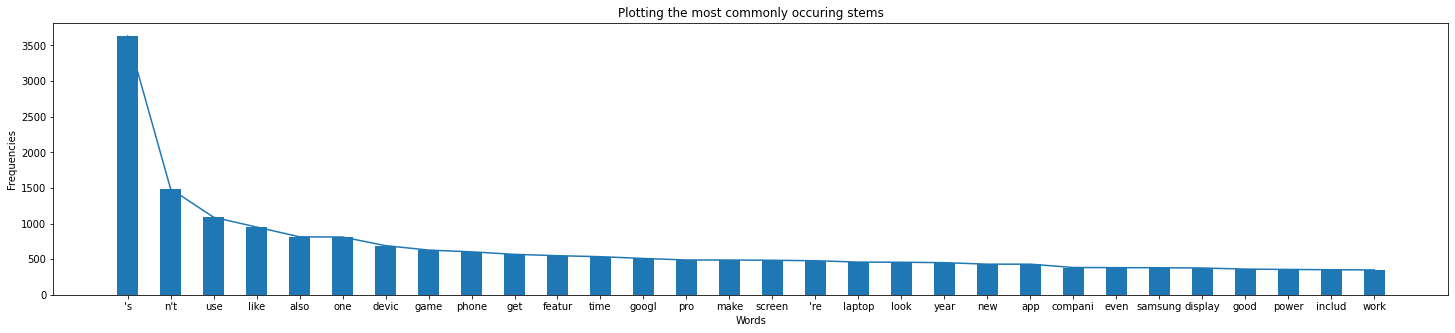

In [ ]:
from matplotlib import pyplot as plt

commonstems = []
commonstemfreq = []

for thing in stemcounteng.most_common(30):
  commonstems.append(thing[0])
  commonstemfreq.append(thing[1])

fig = plt.figure(figsize=(25,5))
plt.xlabel("Words")
plt.ylabel("Frequencies")
plt.title("Plotting the most commonly occuring stems")
plt.bar(commonstems, commonstemfreq, width=0.5)
plt.plot(commonstems,commonstemfreq)
plt.show()

#Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmed = []

for word in nostopeng:
  print(word,"->",lemmatizer.lemmatize(word))
  lemmed.append(lemmatizer.lemmatize(word))

Streaming output truncated to the last 5000 lines.
data -> data
n't -> n't
pull -> pull
data -> data
fitness -> fitness
tracker -> tracker
presumably -> presumably
wearing -> wearing
give -> give
better -> better
assessment -> assessment
also -> also
provide -> provide
better -> better
recommendations -> recommendation
workouts -> workout
right -> right
somewhat -> somewhat
baffling -> baffling
fitbit -> fitbit
's -> 's
versa -> versa
sense -> sense
n't -> n't
fitness -> fitness
tracker -> tracker
's -> 's
also -> also
smartwatch -> smartwatch
testing -> testing
google -> google
pixel -> pixel
3 -> 3
xl -> xl
fitbit -> fitbit
able -> able
key -> key
messaging -> messaging
apis -> apis
could -> could
view -> view
incoming -> incoming
messages -> message
could -> could
respond -> respond
quick -> quick
texts -> text
even -> even
voice -> voice
text -> text
features -> feature
sadly -> sadly
available -> available
pair -> pair
sense -> sense
iphone -> iphone
also -> also
liked -> liked
ea

###Findind the most common lemmatized words

In [ ]:
from collections import Counter

lemcounteng = Counter(lemmed)
print(lemcounteng.most_common(30))

[("'s", 3634), ("n't", 1487), ('like', 821), ('also', 814), ('one', 811), ('device', 690), ('use', 665), ('phone', 603), ('feature', 532), ('time', 527), ('google', 510), ('pro', 489), ('screen', 479), ("'re", 478), ('laptop', 459), ('get', 458), ('year', 451), ('new', 430), ('make', 385), ('company', 383), ('samsung', 380), ('even', 379), ('game', 366), ('display', 362), ('good', 360), ('thing', 345), ('two', 342), ('still', 324), ('camera', 320), ('much', 312)]


### Plotting the same

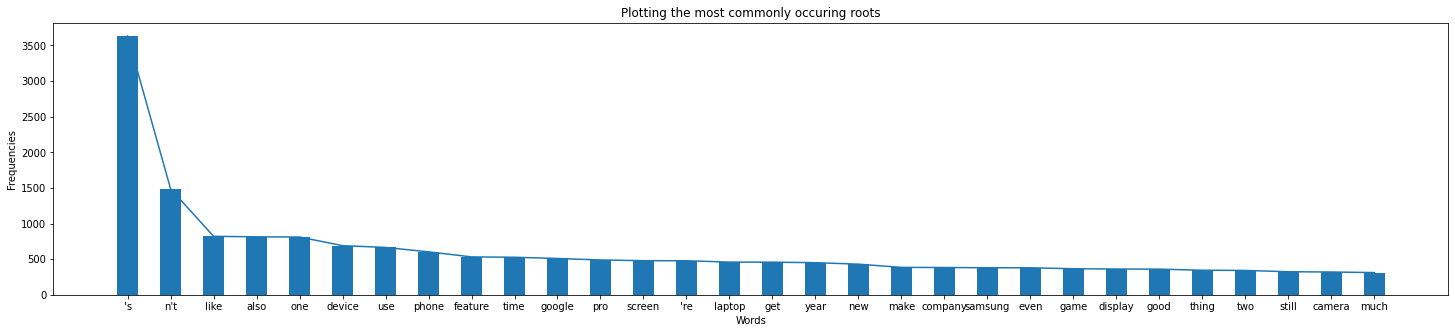

In [ ]:
from matplotlib import pyplot as plt

commonlems = []
commonlemfreq = []

for thing in lemcounteng.most_common(30):
  commonlems.append(thing[0])
  commonlemfreq.append(thing[1])

fig = plt.figure(figsize=(25,5))
plt.xlabel("Words")
plt.ylabel("Frequencies")
plt.title("Plotting the most commonly occuring roots")
plt.bar(commonlems, commonlemfreq, width=0.5)
plt.plot(commonlems,commonlemfreq)
plt.show()

# Word Cloud Algorithm
---
Algorithm or Logic I have thought of for generating the word cloud:
- Having looked at the frequency graphs, I have reached the conclusion that for the word cloud I will be using a pretty simple logic or algorithm 
- I want to use the most commonly occuring words for the word cloud, however the catch is that I want to ensure it doesn't include stopwords or any word with apostrophe while also ensuring that they are mostly either common nouns, proper nouns or verbs 

### More information about the word cloud
---
#### The reason I just want to include the frequency as my importance factor:
- I feel like if I remove the stopwords or words with apostrophe marks and stopwords, the remaining words give a pretty comprehensive view of the main terms that help define the corpus I have selected
- Another thing I want to ensure is that the word included in the word cloud doesn't include words like also, like, etc and thus mainly focus on words which are either nouns or verbs or adjectives mostly
---
#### The reason I picked the 50 most frequent words:
- With the given data, I think the top 50 words would give a pretty comprehensive word cloud of the data without going into terms which are too niche to appear on it 
- A word cloud is sort of meant to give a brief overview of the kind of data we have and I feel like 50 words is a good place to keep it at to ensure that the data is well represented and not made too niche at the same time
- The top 50 words are also going to appear after the code block written below


### Making the required list

In [ ]:
from collections import Counter

wordcounteng = Counter(nostopeng)

freqwords = []

for thing in wordcounteng.most_common(length):
  freqwords.append(thing[0])

possy = nltk.pos_tag(freqwords)
pos = []
for thing in possy:
  pos.append(thing[1])

englishcommonwords = []
englishcommonwordfreq = []

i = 0
index = 0

length = len(wordcounteng)

for thing in wordcounteng.most_common(length):
  if '\'' not in thing[0]:
    if 'NN' in pos[index]:
      englishcommonwords.append(thing[0])
      englishcommonwordfreq.append(thing[1] * 5) #want to give highest relative priority to nouns
      i += 1
    elif 'JJ' in pos[index]:
      englishcommonwords.append(thing[0])
      englishcommonwordfreq.append(thing[1] * 2.5) #finally verbs 
      i += 1
    elif 'VB' in pos[index]:
      englishcommonwords.append(thing[0])
      englishcommonwordfreq.append(thing[1] * 3) #adjectives have the second highest relative priority 
      i += 1

    if i == 50:
      break
    
  index += 1

In [ ]:
n = len(englishcommonwords)

for i in range(n-1):
  for j in range(0, n-i-1):
    if englishcommonwordfreq[j] < englishcommonwordfreq[j + 1] :
            englishcommonwordfreq[j], englishcommonwordfreq[j + 1] = englishcommonwordfreq[j + 1], englishcommonwordfreq[j]
            englishcommonwords[j], englishcommonwords[j + 1] = englishcommonwords[j + 1], englishcommonwords[j]

### Plotting the data

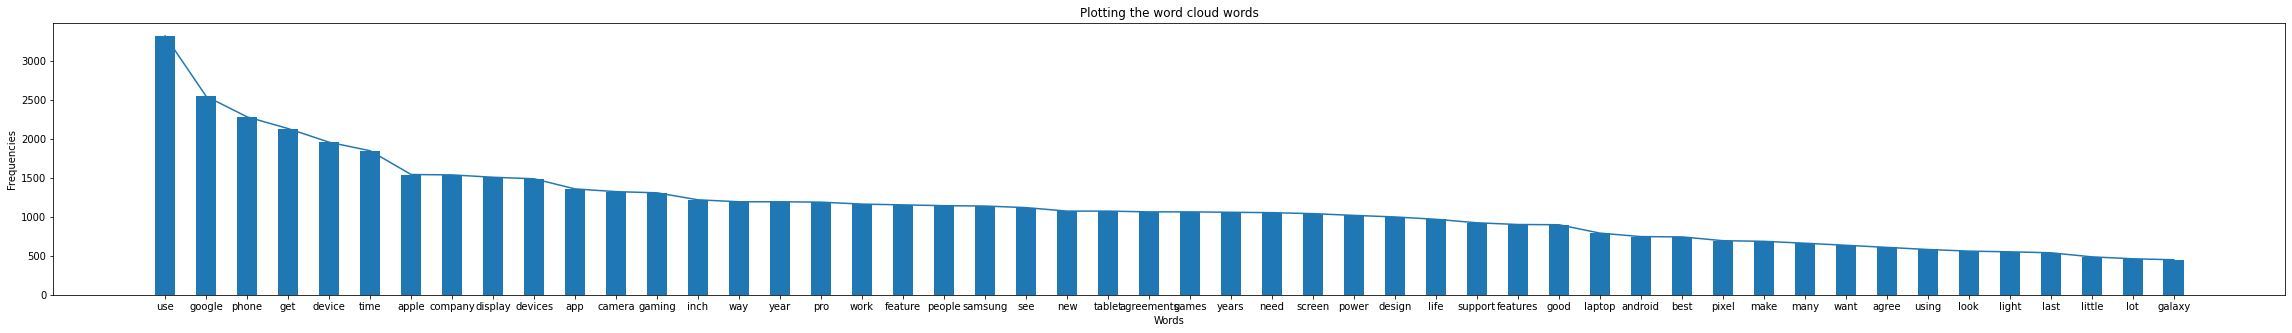

In [ ]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(40,5))
plt.xlabel("Words")
plt.ylabel("Frequencies")
plt.title("Plotting the word cloud words")
plt.bar(englishcommonwords, englishcommonwordfreq, width=0.5)
plt.plot(englishcommonwords,englishcommonwordfreq)
plt.show()

### Printing the most common words that I obtained with the help of my algorithm

In [ ]:
for word in englishcommonwords:
  print(word)

use
google
phone
get
device
time
apple
company
display
devices
app
camera
gaming
inch
way
year
pro
work
feature
people
samsung
see
new
tablet
agreements
games
years
need
screen
power
design
life
support
features
good
laptop
android
best
pixel
make
many
want
agree
using
look
light
last
little
lot
galaxy


#Word Cloud Visualization 

In [ ]:
wcdict = {}

for i in range(len(englishcommonwords)):
  wcdict[englishcommonwords[i]] = englishcommonwordfreq[i]

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(background_color='black', width = 500, height=500, margin=2)

In [ ]:
wc.fit_words(wcdict)
wc.to_file('wc.png')

## Final Word Cloud that was generated
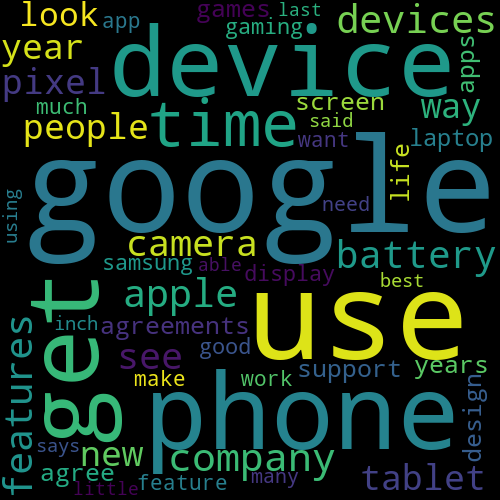